# Download Chicago's Reported Crime Data

## Download and install Spark

In [1]:
!ls

sample_data


In [2]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

## Setup environment

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [4]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2021-09-11 11:24:22--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [             <=>    ]   1.62G  3.44MB/s    in 8m 18s  

2021-09-11 11:32:41 (3.34 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1745141674]



In [5]:
!ls

'rows.csv?accessType=DOWNLOAD'	 spark-2.3.1-bin-hadoop2.7
 sample_data			 spark-2.3.1-bin-hadoop2.7.tgz


In [6]:
!mv rows.csv?accessType=DOWNLOAD reported-crimes.csv

In [7]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [8]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

##*Schemas*

In [9]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [10]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [11]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

## Defining data types of each variables

In [12]:
labels = [
          ('ID', StringType()),
          ('Case Number', StringType()),
          ('Date', TimestampType()),
          ('Block', StringType()),
          ('IUCR', StringType()),
          ('Primary Type', StringType()),
          ('Description', StringType()),
          ('Location Description', StringType()),
          ('Arrest',BooleanType()),
          ('Domestic',BooleanType()),
          ('Beat', StringType()),
          ('District', StringType()),
          ('Ward', StringType()),
          ('Community Area', StringType()),
          ('FBI Code', StringType()),
          ('X Coordinate', StringType()),
          ('Y Coordinate', StringType()),
          ('Year', IntegerType()),
          ('Updated On',TimestampType()),
          ('Latitude', DoubleType()),
          ('Longitude', DoubleType()),
          ('Location', StringType())
]

In [13]:
schema = StructType ([StructField (x[0], x[1], True) for x in labels])
schema

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,BooleanType,true),StructField(Domestic,BooleanType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,IntegerType,true),StructField(Updated On,TimestampType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true)))

In [14]:
rc1 = spark.read.csv('reported-crimes.csv',schema=schema)
rc1.printSchema

<bound method DataFrame.printSchema of DataFrame[ID: string, Case Number: string, Date: timestamp, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: int, Updated On: timestamp, Latitude: double, Longitude: double, Location: string]>

In [15]:
rc1.show(5)

+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|null|       null|null| null|null|        null|       null|                null|  null|    null|null|    null|null|          null|    null|        null|        null|null|      null|    null|     null|    null|
|null|       null|null| null|null|        null|       null|                null|  null|    null|null|    null|null|          null|    null|        null|        

In [16]:
rc.select('IUCR').show(3)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
+----+
only showing top 3 rows



In [17]:
rc.select(rc.IUCR, rc.Description, rc.Domestic).show(3)

+----+--------------------+--------+
|IUCR|         Description|Domestic|
+----+--------------------+--------+
|0486|DOMESTIC BATTERY ...|    true|
|0870|      POCKET-PICKING|   false|
|0810|           OVER $500|    true|
+----+--------------------+--------+
only showing top 3 rows



In [18]:
rc.select('IUCR','Primary Type','Location Description','X Coordinate').show(3)

+----+------------+--------------------+------------+
|IUCR|Primary Type|Location Description|X Coordinate|
+----+------------+--------------------+------------+
|0486|     BATTERY|           RESIDENCE|     1165074|
|0870|       THEFT|             CTA BUS|     1138875|
|0810|       THEFT|           RESIDENCE|        null|
+----+------------+--------------------+------------+
only showing top 3 rows



In [19]:
from pyspark.sql.functions import lit

In [20]:
rc.withColumn('One',lit(1)).show(3)
rc.drop('IUCR').show(3)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|

# Append operation

In [21]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.show(5)

+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00| 003XX S WHIPPLE ST|0810|             THEFT|           OVER $500|              STREET| false| 

In [22]:
one_day.count()

3

In [23]:
rc=rc.union(one_day).orderBy('Date', ascending=False)
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11516594|   JB528186|2018-11-12 00:00:00| 049XX S PRAIRIE AVE|2826|      OTHER OFFENSE|HARASSMENT BY ELE...|               OTHER|

# Top 10 reported crimes

In [24]:
rc.groupBy('Primary Type').count().show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  46200|
|CRIMINAL SEXUAL A...|    894|
|            STALKING|   3385|
|PUBLIC PEACE VIOL...|  47785|
|           OBSCENITY|    585|
|NON-CRIMINAL (SUB...|      9|
|               ARSON|  11156|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14422|
|   CRIMINAL TRESPASS| 193371|
|             ASSAULT| 418512|
|      NON - CRIMINAL|     38|
|LIQUOR LAW VIOLATION|  14068|
| MOTOR VEHICLE THEFT| 314131|
|               THEFT|1418463|
|             BATTERY|1232247|
|             ROBBERY| 255598|
|            HOMICIDE|   9467|
|           RITUALISM|     23|
|    PUBLIC INDECENCY|    161|
+--------------------+-------+
only showing top 20 rows



In [25]:
temp_top_10 = rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418463|
|            BATTERY|1232247|
|    CRIMINAL DAMAGE| 771502|
|          NARCOTICS| 711748|
|      OTHER OFFENSE| 418877|
|            ASSAULT| 418512|
|           BURGLARY| 388037|
|MOTOR VEHICLE THEFT| 314131|
| DECEPTIVE PRACTICE| 266474|
|            ROBBERY| 255598|
+-------------------+-------+
only showing top 10 rows



# Find the Percentage of reported crimes that resulted in Arrest

In [26]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [27]:
Answer = rc.filter(col('Arrest')==True).count()/rc.select('Arrest').count()*100

In [28]:
Answer

27.754777062991394

# Find top 3 locations for reported crimes

In [29]:
rc.groupBy('Location Description').count().orderBy('count',ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770589|
|           RESIDENCE|1145424|
|           APARTMENT| 698622|
+--------------------+-------+
only showing top 3 rows



PySpark Built in Functions

In [30]:
from pyspark.sql import functions

In [31]:
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

String Function

In [32]:
from pyspark.sql.functions import *

In [33]:
rc.select(lower(rc.Block)).show(3)

+-------------------+
|       lower(Block)|
+-------------------+
|049xx s prairie ave|
| 003xx s whipple st|
|010xx n dearborn st|
+-------------------+
only showing top 3 rows



In [34]:
rc.select(upper(col('Block')),lower(col('Block')),substring(col('Block'),8,5)).show(3)

+-------------------+-------------------+----------------------+
|       upper(Block)|       lower(Block)|substring(Block, 8, 5)|
+-------------------+-------------------+----------------------+
|049XX S PRAIRIE AVE|049xx s prairie ave|                  PRAI|
| 003XX S WHIPPLE ST| 003xx s whipple st|                  WHIP|
|010XX N DEARBORN ST|010xx n dearborn st|                  DEAR|
+-------------------+-------------------+----------------------+
only showing top 3 rows



Numeric Functions

In [35]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [36]:
rc.select(min(col('Date')),max(rc.Date)).show(3)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-12 00:00:00|
+-------------------+-------------------+



3 days earlier than the oldest date and 3 days later than the most recent date

In [37]:
rc.select(date_add(min(col('Date')),-3),date_add(max(col('Date')),3)).show(3)

+-----------------------+----------------------+
|date_add(min(Date), -3)|date_add(max(Date), 3)|
+-----------------------+----------------------+
|             2000-12-29|            2018-11-15|
+-----------------------+----------------------+



In [38]:
rc.select(date_sub(min(col('Date')),3),date_sub(max(col('Date')),-3)).show(3)

+----------------------+-----------------------+
|date_sub(min(Date), 3)|date_sub(max(Date), -3)|
+----------------------+-----------------------+
|            2000-12-29|             2018-11-15|
+----------------------+-----------------------+



PySpark Joins

Download Police Station Dataset

In [39]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD&bom=true&format=true&delimiter=%3B
!ls -l

--2021-09-11 12:15:49--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2021-09-11 12:15:49 (172 MB/s) - ‘police-station.csv’ saved [5699]

total 1924856
-rw-r--r--  1 root root       5699 Aug 19  2019 police-station.csv
-rw-r--r--  1 root root 1745141674 Sep 10 11:14 reported-crimes.csv
drwxr-xr-x  1 root root       4096 Sep  1 19:26 sample_data
drwxrwxr-x 13 1000 1000       4096 Jun  1  2018 spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root  225883783 Jun  1  2018 spark-2.3.1-bin-hadoop2.7.tgz
drwxr-xr-x  2 root root       4096 Sep 11 11:32 spark-warehouse


In [40]:
ps = spark.read.csv('police-station.csv',header=True)
ps.show(2)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

In [41]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION']

In [45]:
rc.join(ps,rc.District==lpad(ps.DISTRICT,3,'0'),'left').drop('ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION').show(10)


+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|11505149|   JB513151|2018-11-12 00:00:00|  003XX S WHIPPLE ST|0810|              THEFT|           OVER $500|              STREET| false|   false|1124|     011|  28|            27|      06|2018|11/19/2018 04:22:...|      11|     Harrison|
|11516594|   JB528186|2018-11-12 00:00:00| 0

# Find the most frequently reported non criminal activity

In [47]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(40, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [48]:
rc.cache()

DataFrame[ID: string, Case Number: string, Date: timestamp, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: string, District: string, Ward: string, Community Area: string, FBI Code: string, X Coordinate: string, Y Coordinate: string, Year: string, Updated On: string, Latitude: string, Longitude: string, Location: string]

In [53]:
rc.filter( (col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)')).groupBy('Description').count().orderBy('count', ascending=False).show(20)

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|       LOST PASSPORT|  107|
|   FOID - REVOCATION|   75|
|NOTIFICATION OF C...|    9|
|NOTIFICATION OF S...|    8|
|      FOUND PASSPORT|    4|
|CONCEALED CARRY L...|    4|
|GUN OFFENDER NOTI...|    3|
+--------------------+-----+



# Find the day of week with most reported crime

In [54]:
from pyspark.sql.functions import dayofweek, date_format

In [55]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [56]:
rc.select(col('Date'),dayofweek(col('Date')), date_format(col('Date'),'E')).show()

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2018-11-12 00:00:00|              2|                 Mon|
|2018-11-12 00:00:00|              2|                 Mon|
|2018-11-12 00:00:00|              2|                 Mon|
|2018-11-10 23:55:00|              7|                 Sat|
|2018-11-10 23:53:00|              7|                 Sat|
|2018-11-10 23:50:00|              7|                 Sat|
|2018-11-10 23:45:00|              7|                 Sat|
|2018-11-10 23:42:00|              7|                 Sat|
|2018-11-10 23:41:00|              7|                 Sat|
|2018-11-10 23:35:00|              7|                 Sat|
|2018-11-10 23:35:00|              7|                 Sat|
|2018-11-10 23:35:00|              7|                 Sat|
|2018-11-10 23:33:00|              7|                 Sat|
|2018-11-10 23:30:00|              7|                 Sa

In [57]:
rc.groupby(date_format(col('Date'),'E')).count().orderBy('count', ascending=False).show(10)

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017158|
|                 Wed| 974076|
|                 Tue| 968222|
|                 Sat| 965348|
|                 Thu| 964766|
|                 Mon| 952927|
|                 Sun| 912124|
+--------------------+-------+



Get Row elements from dataset

In [58]:
rc.groupby(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912124),
 Row(date_format(Date, E)='Mon', count=952927),
 Row(date_format(Date, E)='Thu', count=964766),
 Row(date_format(Date, E)='Sat', count=965348),
 Row(date_format(Date, E)='Wed', count=974076),
 Row(date_format(Date, E)='Fri', count=1017158),
 Row(date_format(Date, E)='Tue', count=968222)]

Get all row elements and plot Day of week and counts

In [60]:
vw_day = [x[0] for x in rc.groupby(date_format(col('Date'),'E')).count().collect()]
vw_day

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [61]:
day_cnt = [x[1] for x in rc.groupby(date_format(col('Date'),'E')).count().collect()]
day_cnt

[912124, 952927, 964766, 965348, 974076, 1017158, 968222]

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
cp = pd.DataFrame({'Day of Week':vw_day,'Count':day_cnt})
cp

,Day of Week,Count
0,Sun,912124
1,Mon,952927
2,Thu,964766
3,Sat,965348
4,Wed,974076
5,Fri,1017158
6,Tue,968222


Text(0.5, 1.0, 'Number of Reported Crimes per day of the week')

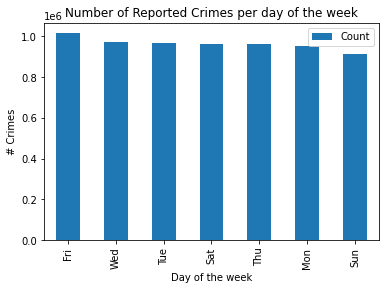

In [67]:
cp.sort_values('Count', ascending=False).plot(kind='bar', x='Day of Week', y='Count')
plt.xlabel('Day of the week')
plt.ylabel('# Crimes')
plt.title('Number of Reported Crimes per day of the week')